<a href="https://colab.research.google.com/github/Nanasz/Kelompok4-DataMining1/blob/main/Kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Data
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Running Locally, yakinkan "file_" berada di folder "data"
try :
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/Nanasz/Kelompok4-DataMining1/main/Data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/Nanasz/Kelompok4-DataMining1/main/Data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/Nanasz/Kelompok4-DataMining1/main/Data/jakarta.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfT.shape

((1024, 26), (998, 26), (128, 26))

In [3]:
frame = [dfJ, dfD, dfT]
data_rumah= pd.concat(frame, ignore_index = True)
data_rumah

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_rumah.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [5]:
data_rumah = data_rumah.drop(data_rumah.columns[14:26], axis= 1)
data_rumah.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi'],
      dtype='object')

In [6]:
data_rumah

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1.000000e+03,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...
2146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check for missing values
data_rumah.isnull().sum()

created_at    1786
LT            1785
LB            1787
KT            1787
KM            1787
garasi        2043
carport       1874
lokasi        1787
sertifikat    1791
listrik       1816
hadap         2003
harga         1787
URL           1787
deskripsi     1796
dtype: int64

In [8]:
data_rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  364 non-null    object 
 1   LT          365 non-null    object 
 2   LB          363 non-null    float64
 3   KT          363 non-null    float64
 4   KM          363 non-null    float64
 5   garasi      107 non-null    float64
 6   carport     276 non-null    float64
 7   lokasi      363 non-null    object 
 8   sertifikat  359 non-null    object 
 9   listrik     334 non-null    float64
 10  hadap       147 non-null    object 
 11  harga       363 non-null    float64
 12  URL         363 non-null    object 
 13  deskripsi   354 non-null    object 
dtypes: float64(7), object(7)
memory usage: 235.3+ KB


In [9]:
#menghilangkan missing value
data_rumah.dropna(inplace=True)
print(data_rumah.isnull().sum())

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         0
harga         0
URL           0
deskripsi     0
dtype: int64


In [10]:
# Descriptive statistics
data_rumah.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LB,43.0,2.458837e+02,2.089802e+02,36.0,51.0,200.0,3.900000e+02,1.000000e+03
KT,43.0,3.860465e+00,1.551979e+00,2.0,2.5,4.0,5.000000e+00,8.000000e+00
KM,43.0,3.116279e+00,1.530784e+00,1.0,2.0,3.0,4.000000e+00,6.000000e+00
garasi,43.0,1.581395e+00,9.569933e-01,1.0,1.0,1.0,2.000000e+00,5.000000e+00
carport,43.0,1.488372e+00,6.314041e-01,1.0,1.0,1.0,2.000000e+00,3.000000e+00
listrik,43.0,4.462791e+03,5.878533e+03,1300.0,1750.0,2200.0,4.400000e+03,3.300000e+04
harga,43.0,4.058839e+09,9.396836e+09,148.0,600.0,3600.0,4.525000e+09,4.950000e+10


In [11]:
## Hapus missing values
data_rumah.dropna(inplace=True)
print(data_rumah.isnull().sum())

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         0
harga         0
URL           0
deskripsi     0
dtype: int64


In [12]:
data_rumah.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 6 to 2143
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  43 non-null     object 
 1   LT          43 non-null     object 
 2   LB          43 non-null     float64
 3   KT          43 non-null     float64
 4   KM          43 non-null     float64
 5   garasi      43 non-null     float64
 6   carport     43 non-null     float64
 7   lokasi      43 non-null     object 
 8   sertifikat  43 non-null     object 
 9   listrik     43 non-null     float64
 10  hadap       43 non-null     object 
 11  harga       43 non-null     float64
 12  URL         43 non-null     object 
 13  deskripsi   43 non-null     object 
dtypes: float64(7), object(7)
memory usage: 5.0+ KB


In [13]:
data_rumah['sertifikat'].value_counts()

SHM                                36
SHM + IMB                           3
lainnya(PPJB, GIRIK, ADAT, dll)     2
SHM + IMB + PBB                     1
PPJB                                1
Name: sertifikat, dtype: int64

In [14]:
data_rumah['hadap'].value_counts()

Timur         12
Utara         12
Selatan        9
Barat          4
Timur Laut     3
timur          1
Tenggara       1
Barat Daya     1
Name: hadap, dtype: int64

In [15]:
#mengecek duplicate
data_rumah.drop_duplicates(inplace=True)
data_rumah.duplicated().sum()

0

In [16]:
missing_data = pd.DataFrame({'total_missing': data_rumah.isnull().sum(), 'perc_missing': (data_rumah.isnull().sum()/102)*100})
missing_data

,total_missing,perc_missing
created_at,0,0.0
LT,0,0.0
LB,0,0.0
KT,0,0.0
KM,0,0.0
garasi,0,0.0
carport,0,0.0
lokasi,0,0.0
sertifikat,0,0.0
listrik,0,0.0


Text(0.5, 0, 'Listrik')

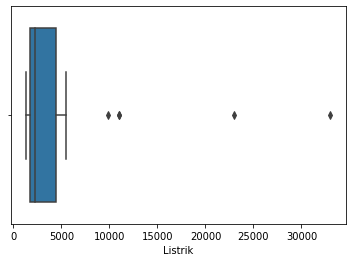

In [17]:
# Detect outliers
# Outlier di variabel listrik
ax = sns.boxplot(x=data_rumah["listrik"])
ax.set_xlabel('Listrik')

Text(0.5, 0, 'Luas Bangunan')

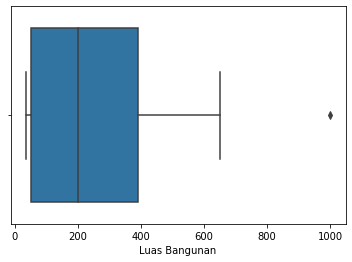

In [18]:
# Outlier di variabel Luas Bangunan
ax = sns.boxplot(x=data_rumah["LB"])
ax.set_xlabel('Luas Bangunan')

Text(0.5, 0, 'Kamar Tidur')

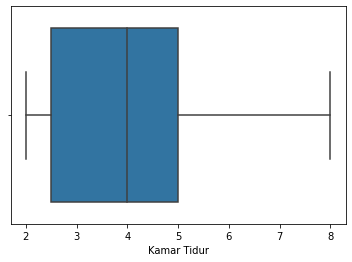

In [19]:
# Outlier di variabel Kamar Tidur
ax = sns.boxplot(x=data_rumah["KT"])
ax.set_xlabel('Kamar Tidur')

Text(0.5, 0, 'Kamar Mandi')

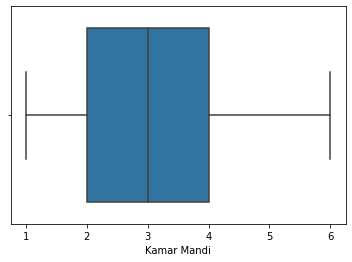

In [20]:
# Outlier di variabel Kamar Mandi
ax = sns.boxplot(x=data_rumah["KM"])
ax.set_xlabel('Kamar Mandi')

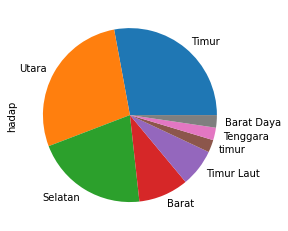

In [21]:
plot = data_rumah.hadap.value_counts().plot(kind='pie')

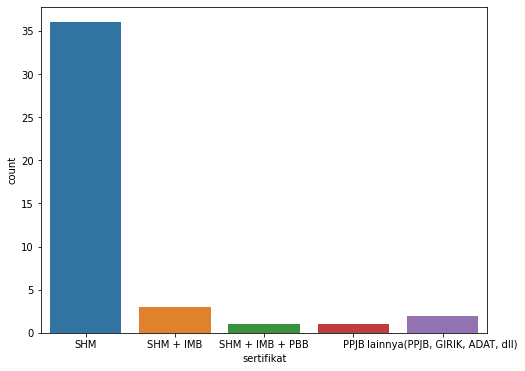

In [22]:
plt.figure(figsize=(8,6))
a = sns.countplot(x="sertifikat", data=data_rumah)

Sawangan                        6
Jakarta Selatan                 6
Jakarta Utara                   5
Jakarta Barat                   3
BSD, TANGERANG                  3
CIKUPA CITRA JAYA, TANGERANG    2
Cipayung                        2
Pancoran Mas                    2
BSD CITY, TANGERANG             1
PONDOK CABE, TANGERANG          1
Name: lokasi, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


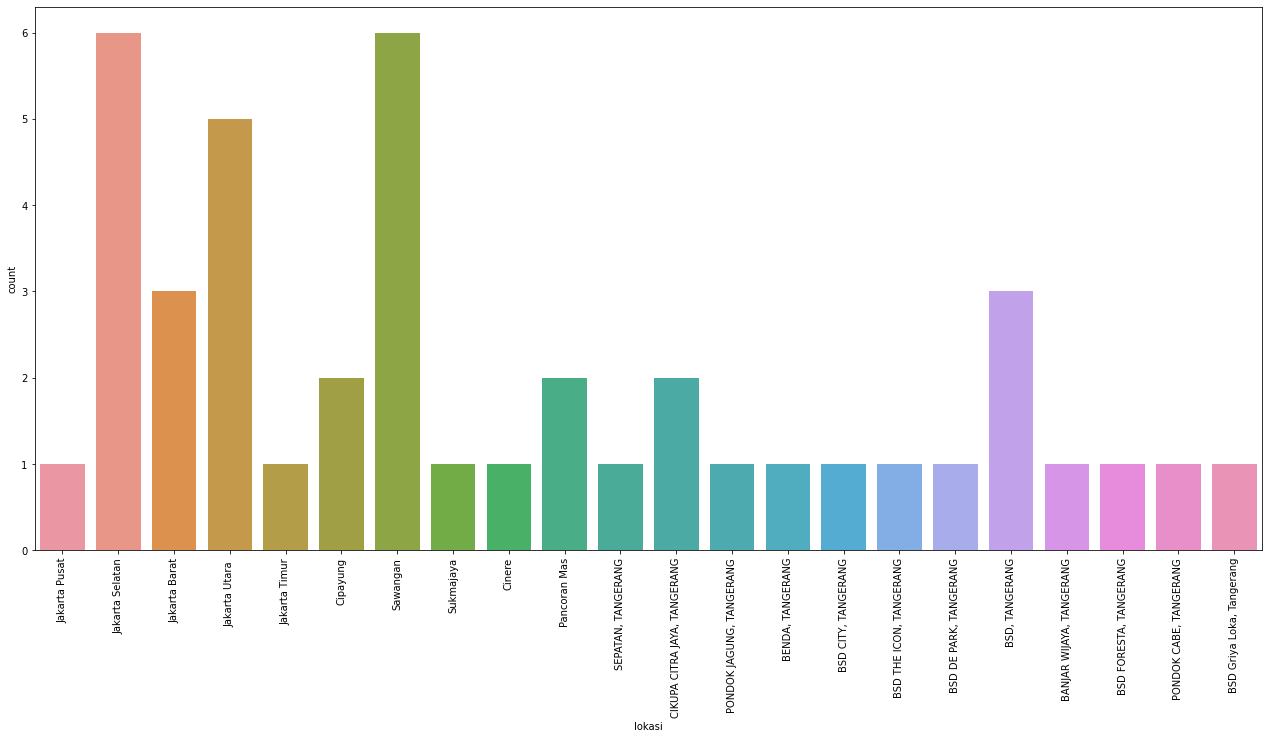

In [23]:
print(data_rumah['lokasi'].value_counts()[:10])
plt.figure(figsize=(22,10))
sns.countplot(data_rumah['lokasi'])
plt.xticks(rotation=90)
plt.show()

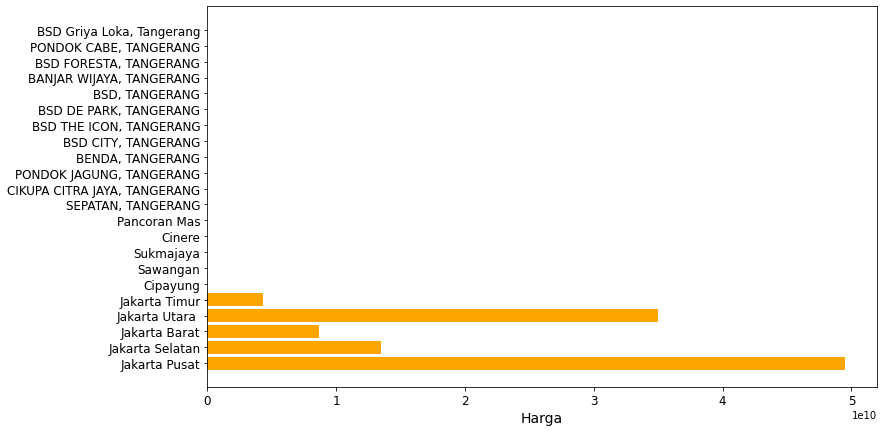

In [24]:
plt.figure(figsize=(12,7))
plt.barh(data_rumah['lokasi'], data_rumah['harga'], color='orange')
plt.xlabel('Harga', size = 14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

Text(0, 0.5, 'listrik')

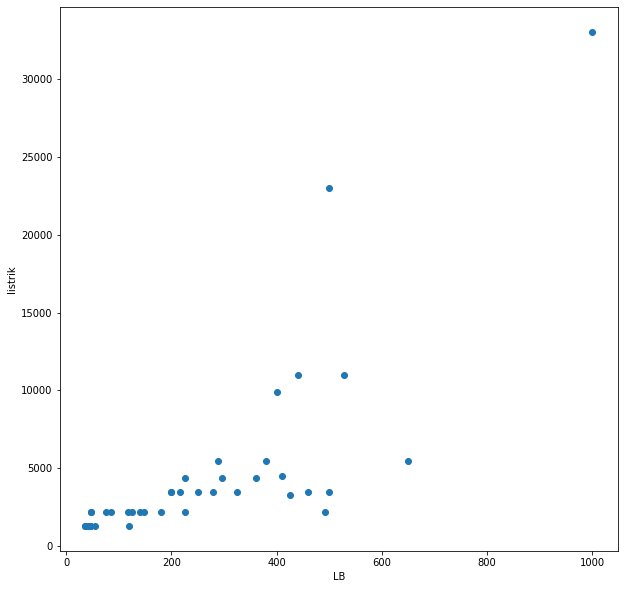

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(x='LB',y='listrik',data=data_rumah)
plt.xlabel('LB')
plt.ylabel('listrik')

Text(0, 0.5, 'harga')

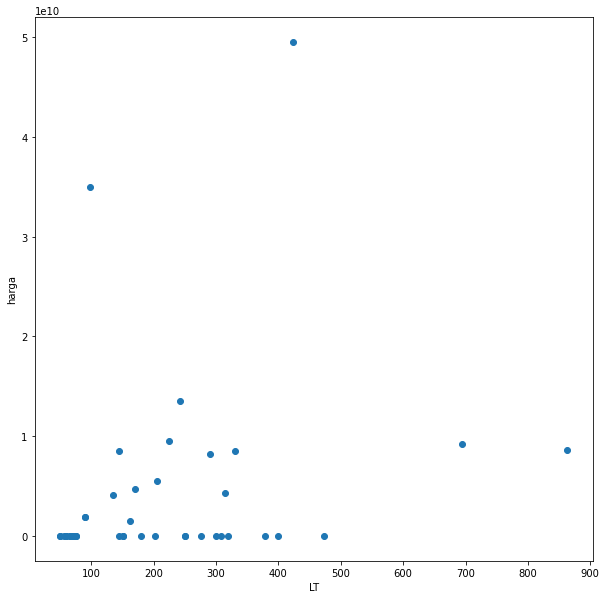

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(x='LT',y='harga',data=data_rumah)
plt.xlabel('LT')
plt.ylabel('harga')